In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head() 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [32]:
df.shape

(8124, 23)

## Here, class feature is our target and all other are input features
### p: Poisonous, e: Edible

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
print("Encoding: ", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Encoding:  {'e': 0, 'p': 1}


In [34]:
X, y = df.drop('class', axis=1), df['class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, shuffle=True)

In [35]:
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7447,k,y,e,f,s,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,p
4108,f,f,g,f,f,f,c,b,p,e,...,k,b,n,p,w,o,l,h,v,g
1299,f,s,w,f,n,f,w,b,n,t,...,s,w,w,p,w,o,e,n,a,g
4196,x,y,n,f,y,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,d
6361,x,y,e,f,y,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,d


In [36]:
x_train.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,...,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,2578,2280,1617,3315,2474,5549,4778,3919,1225,3258,...,3466,3114,3033,5686,5558,5255,2774,1674,2832,2229


## Checking for NULL values

<AxesSubplot:>

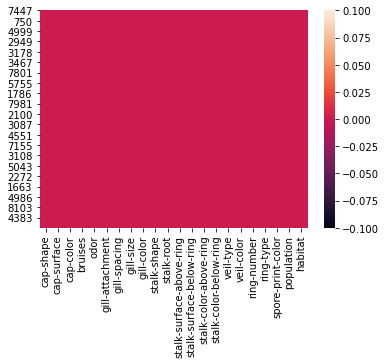

In [37]:
sns.heatmap(x_train.isnull())

### There are no null values in the data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

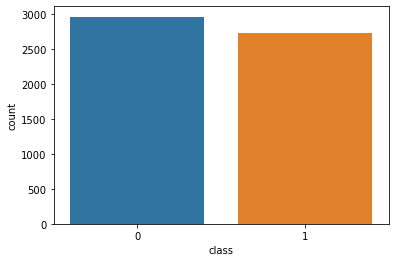

In [38]:
sns.countplot(y_train)

### Our data is almost equally distributed in two classes

## Converting our categorical features into numerical features

In [39]:
from sklearn.preprocessing import LabelEncoder
for column in x_train.columns:
    encoder = LabelEncoder()
    encoder.fit(x_train[column])
    x_train[column] = encoder.transform(x_train[column])
    x_test[column] = encoder.transform(x_test[column])

<ipython-input-39-23210be6ba97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column] = encoder.transform(x_train[column])
<ipython-input-39-23210be6ba97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[column] = encoder.transform(x_test[column])


In [40]:
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7447,3,3,2,0,7,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,4
4108,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,4,1
1299,2,2,8,0,5,1,1,0,5,1,...,2,7,7,0,2,1,0,3,0,1
4196,5,3,4,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,0
6361,5,3,2,0,8,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,0


## Removing any constant or low variation feature from our data

In [41]:
from sklearn.feature_selection import VarianceThreshold
thresh = VarianceThreshold(0.1) #Removing features with variance less than 10%
thresh.fit(x_train)
thresh.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True])

In [42]:
x_test = x_test[x_train.columns[thresh.get_support()]]
x_train = x_train[x_train.columns[thresh.get_support()]]

In [43]:
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
7447,3,3,2,0,7,0,1,0,1,0,1,1,7,7,0,7,4,4
4108,2,0,3,0,2,0,0,7,0,1,1,1,0,4,2,1,4,1
1299,2,2,8,0,5,1,0,5,1,3,2,2,7,7,0,3,0,1
4196,5,3,4,0,8,0,1,0,1,0,1,1,6,6,0,7,4,0
6361,5,3,2,0,8,0,1,0,1,0,2,2,6,6,0,7,4,0


## Exploring Correlation between features

In [44]:
x_train.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.056279,-0.042806,-0.040624,-0.020341,0.027082,0.060050,-0.009355,0.067390,0.033585,-0.029427,-0.036135,-0.025880,-0.020674,-0.028407,-0.072159,0.054795,-0.042394
cap-surface,-0.056279,1.000000,-0.021192,0.060704,0.044482,-0.279666,0.203675,-0.161559,-0.018866,-0.130801,0.087267,0.092741,0.066538,0.072473,-0.110602,0.229990,0.021793,0.164586
cap-color,-0.042806,-0.021192,1.000000,-0.000174,-0.398873,0.140134,-0.170789,0.091467,-0.464080,0.317718,-0.063808,-0.045242,0.016440,0.010310,0.171817,-0.300560,-0.145374,0.032583
bruises,-0.040624,0.060704,-0.000174,1.000000,-0.062914,-0.300515,-0.379823,0.539523,0.099116,0.242589,0.474442,0.459968,0.071217,0.085880,0.698268,-0.290048,0.086958,-0.085781
odor,-0.020341,0.044482,-0.398873,-0.062914,1.000000,0.054673,0.311932,-0.145757,0.469712,-0.211808,0.112715,0.063371,0.171021,0.167237,-0.286737,0.473491,-0.032229,-0.014416
gill-spacing,0.027082,-0.279666,0.140134,-0.300515,0.054673,1.000000,-0.110141,0.088909,0.081267,0.357036,-0.230287,-0.213485,0.272848,0.252691,-0.195759,0.036142,-0.529477,-0.154516
gill-size,0.060050,0.203675,-0.170789,-0.379823,0.311932,-0.110141,1.000000,-0.523539,0.214751,-0.353342,0.052712,0.010872,0.297174,0.277081,-0.465751,0.629882,0.147558,0.172406
gill-color,-0.009355,-0.161559,0.091467,0.539523,-0.145757,0.088909,-0.523539,1.000000,-0.179197,0.321465,0.233575,0.256457,-0.060736,-0.079596,0.632464,-0.427752,-0.026929,-0.216049
stalk-shape,0.067390,-0.018866,-0.464080,0.099116,0.469712,0.081267,0.214751,-0.179197,1.000000,-0.167088,0.018700,-0.026878,0.216351,0.233345,-0.288441,0.263310,0.089423,-0.271138
stalk-root,0.033585,-0.130801,0.317718,0.242589,-0.211808,0.357036,-0.353342,0.321465,-0.167088,1.000000,-0.036054,0.088123,0.156575,0.161438,0.215114,-0.545388,-0.316461,-0.008280


<AxesSubplot:>

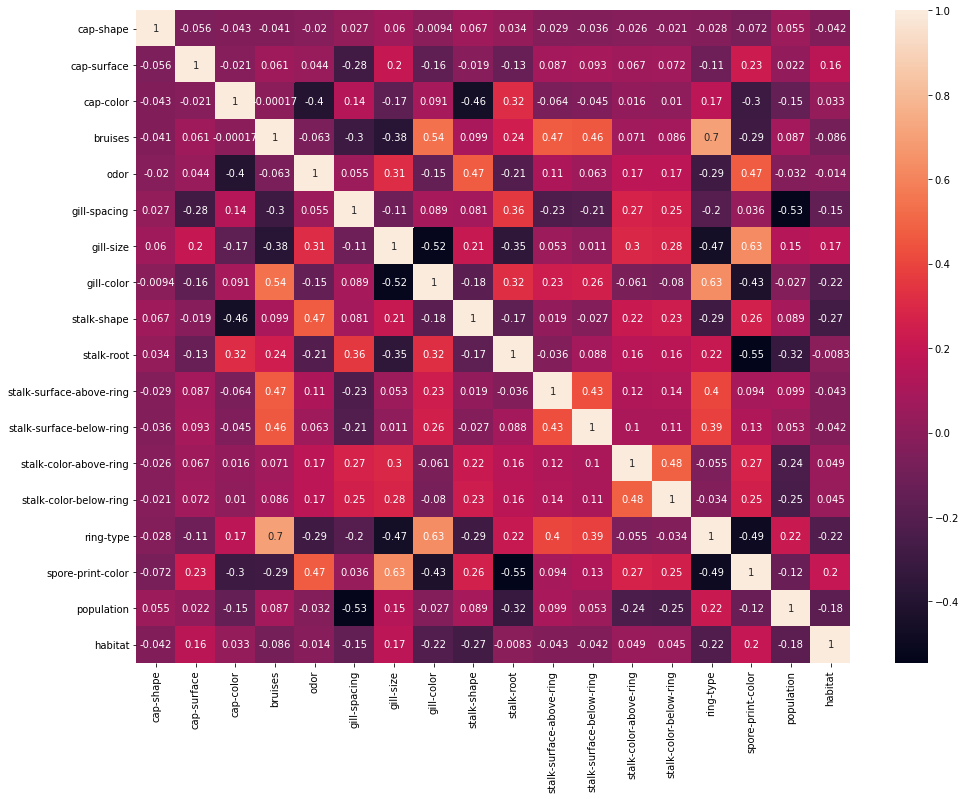

In [45]:
plt.figure(figsize=(16, 12))
sns.heatmap(x_train.corr(), annot=True)

### There are no feature with very high correlation

In [46]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
selectkbest = SelectKBest(score_func=mutual_info_classif, k=17)
selectkbest.fit(x_train, y_train)
x_test = x_test[x_train.columns[selectkbest.get_support()]]
x_train = x_train[x_train.columns[selectkbest.get_support()]]
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
7447,3,3,2,0,7,0,1,0,0,1,1,7,7,0,7,4,4
4108,2,0,3,0,2,0,0,7,1,1,1,0,4,2,1,4,1
1299,2,2,8,0,5,1,0,5,3,2,2,7,7,0,3,0,1
4196,5,3,4,0,8,0,1,0,0,1,1,6,6,0,7,4,0
6361,5,3,2,0,8,0,1,0,0,2,2,6,6,0,7,4,0


# Models

## Logistic Regerssion

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Training accuracy score: ", lr.score(x_train, y_train))
print("Testing accuracy score: ", lr.score(x_test, y_test))

Training accuracy score:  0.9486457966936335
Testing accuracy score:  0.9380639868744873


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K nearest neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train, y_train)
print("Training accuracy score: ", kc.score(x_train, y_train))
print("Testing accuracy score: ", kc.score(x_test, y_test))

Training accuracy score:  0.9989447766443897
Testing accuracy score:  0.9983593109105825


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print("Training accuracy score: ", rfc.score(x_train, y_train))
print("Testing accuracy score: ", rfc.score(x_test, y_test))

Training accuracy score:  1.0
Testing accuracy score:  1.0


In [52]:
acc = pd.DataFrame({
    "Model": ['Logistic Regression', "K Neighbour Classifier", "Random Forest Classifier"],
    "Training Accuracy": [lr.score(x_train, y_train), kc.score(x_train, y_train), rfc.score(x_train, y_train)],
    "Testing Accuracy": [lr.score(x_test, y_test), kc.score(x_test, y_test), rfc.score(x_test, y_test)]
})
acc.head()

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.948646,0.938064
1,K Neighbour Classifier,0.998945,0.998359
2,Random Forest Classifier,1.000000,1.000000


<AxesSubplot:xlabel='Model'>

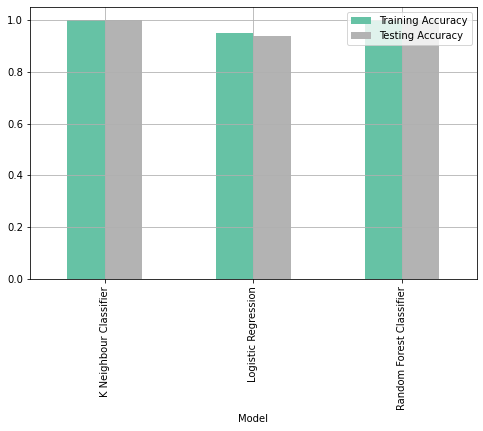

In [53]:
acc.groupby("Model").sum().plot(kind='bar', legend=True, grid=True, figsize = (8, 5), colormap = "Set2")

# We can see that no model has overfitten or underfitten
# Random Forest has given perfect accuracy on training and testing data
# Other models have also performed very well